In [1]:
from multiConceptPipeline import MultiPrompt2PromptPipeline
import torch 
import numpy as np
from attentionControlMulti import AttentionSwap
from utils import view_images


In [2]:
# 基础模型位置
model_path = "/work/imc_lab/ld_xu/stable-diffusion-v1-4"


## multiConceptPipeline相关配置代码 主要是自己改写的pipeline

In [3]:
# custom模型位置
custom_path = "/home/ld_xu/myproject/multi/cat_wooden_pot/500"
device = torch.device('cuda:2') if torch.cuda.is_available() else torch.device('cpu')
# 加载custom模型的参数
pipe = MultiPrompt2PromptPipeline.from_pretrained(model_path).to(device)
pipe.load_textual_inversion(custom_path, weight_name="_new1_.bin")
pipe.load_textual_inversion(custom_path, weight_name="_new2_.bin")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/home/ld_xu/myproject/diffusers/src/diffusers/models/lora.py:300: FutureWarning: `LoRACompatibleConv` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleConv` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleConv", "1.0.0", deprecation_message)
/home/ld_xu/myproject/diffusers/src/diffusers/models/lora.py:387: FutureWarning: `LoRACompatibleLinear` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleLinear` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleLinear", "1.0.0", deprecation_message)


In [ ]:
# 配置随机种子
g_cpu = torch.Generator().manual_seed(5837)

----------------------------------------------------------------------------------------------------------
Successfull to load the Custom Diffusion Modle Weight from file:/home/ld_xu/myproject/multi/cat_wooden_pot/500
----------------------------------------------------------------------------------------------------------


/home/ld_xu/myproject/diffusers/src/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:293: FutureWarning: `_encode_prompt()` is deprecated and it will be removed in a future version. Use `encode_prompt()` instead. Also, be aware that the output format changed from a concatenated tensor to a tuple.
  deprecate("_encode_prompt()", "1.0.0", deprecation_message, standard_warn=False)
/home/ld_xu/myproject/multiConcept/multiConcept/multiConceptPipeline.py:68: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  num_channels_latents = self.unet.in_channels


  0%|          | 0/50 [00:00<?, ?it/s]

/home/ld_xu/myproject/diffusers/src/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:567: FutureWarning: The decode_latents method is deprecated and will be removed in 1.0.0. Please use VaeImageProcessor.postprocess(...) instead
  deprecate("decode_latents", "1.0.0", deprecation_message, standard_warn=False)


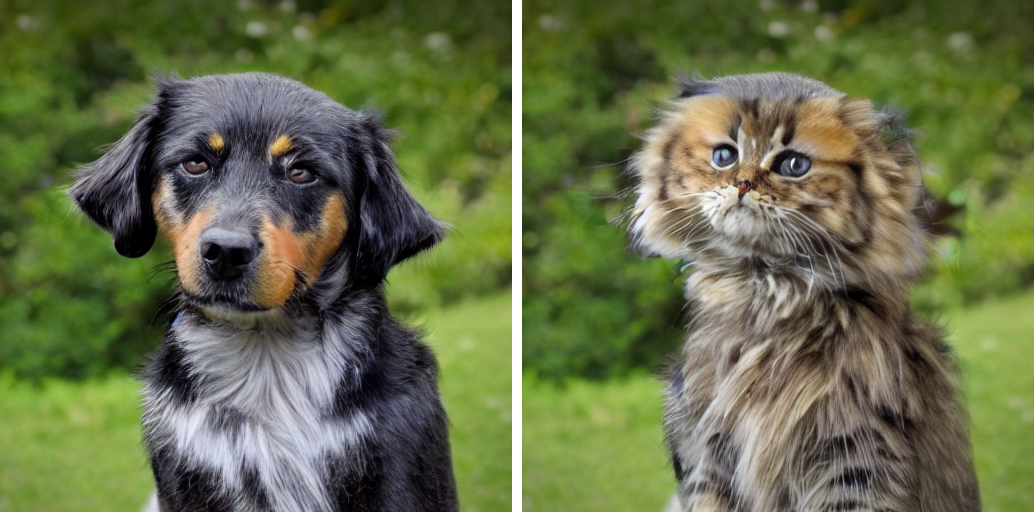

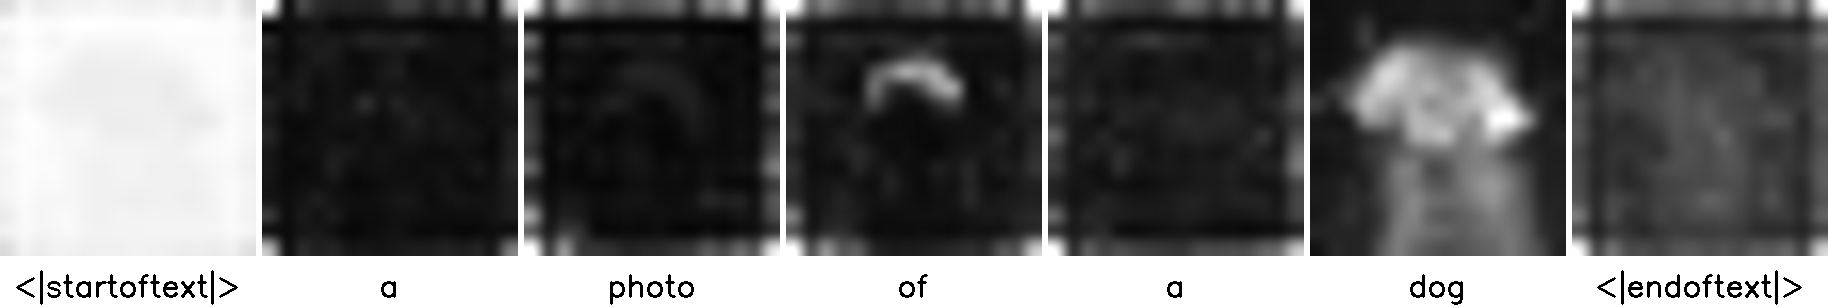

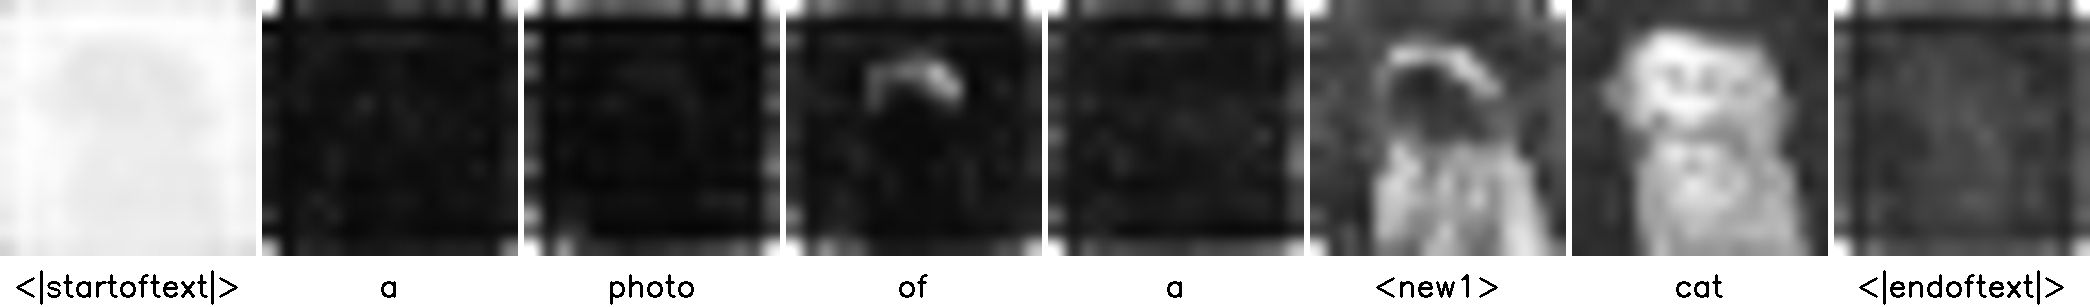

In [4]:
prompts = ["A photo of a dog",
           "A photo of a <new1> cat"]

NUM_DIFFUSION_STEPS = 50
source_subject_word = 'dog'
target_subject_word = '<new1>'

source_substruct_words = 'pot'
target_substruct_words = '<new2>'

# source_subject_word = 'dog'
# target_subject_word = '<new1>'

# 如果需要多概念编辑，则需要额外再指定一些词 不然就是None
# sustract_words = (((source_substruct_words,), (target_substruct_words,)))
sustract_words = None
controller = AttentionSwap(prompts, NUM_DIFFUSION_STEPS, 
                            cross_map_replace_steps=.7,
                            self_map_replace_steps=.3,
                            self_output_replace_steps=.2,
                            tokenizer=pipe.tokenizer,
                            device=pipe.device,
                            source_subject_word=source_subject_word, 
                            target_subject_word=target_subject_word,
                            substruct_words=sustract_words,
                            )

outputs = pipe(prompt=prompts, height=512, width=512, num_inference_steps=NUM_DIFFUSION_STEPS,
                controller=controller, generator=g_cpu, guidance_scale = 6.0, ModelPath = custom_path)

view_images( [np.array(img) for img in outputs.images] )

pipe.show_cross_attention(prompts, controller, res=16, from_where=("up", "down"), select=0)
pipe.show_cross_attention(prompts, controller, res=16, from_where=("up", "down"), select=1)



## p2p + DreamBooth

In [5]:
from pipeline_prompt2prompt import Prompt2PromptPipeline
from ptp_utils import LocalBlend, AttentionRefine, view_images

In [6]:
#g_cpu = torch.Generator().manual_seed(2333)
device = torch.device('cuda:3') if torch.cuda.is_available() else torch.device('cpu')
pipe = Prompt2PromptPipeline.from_pretrained(model_path).to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, -1), (6, -1), (7, -1), (8, -1), (9, 5), (10, 6)]


/home/ld_xu/myproject/diffusers/src/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:293: FutureWarning: `_encode_prompt()` is deprecated and it will be removed in a future version. Use `encode_prompt()` instead. Also, be aware that the output format changed from a concatenated tensor to a tuple.
  deprecate("_encode_prompt()", "1.0.0", deprecation_message, standard_warn=False)
/home/ld_xu/myproject/multiConcept/multiConcept/pipeline_prompt2prompt.py:65: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  num_channels_latents = self.unet.in_channels


  0%|          | 0/50 [00:00<?, ?it/s]

/home/ld_xu/myproject/diffusers/src/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:567: FutureWarning: The decode_latents method is deprecated and will be removed in 1.0.0. Please use VaeImageProcessor.postprocess(...) instead
  deprecate("decode_latents", "1.0.0", deprecation_message, standard_warn=False)


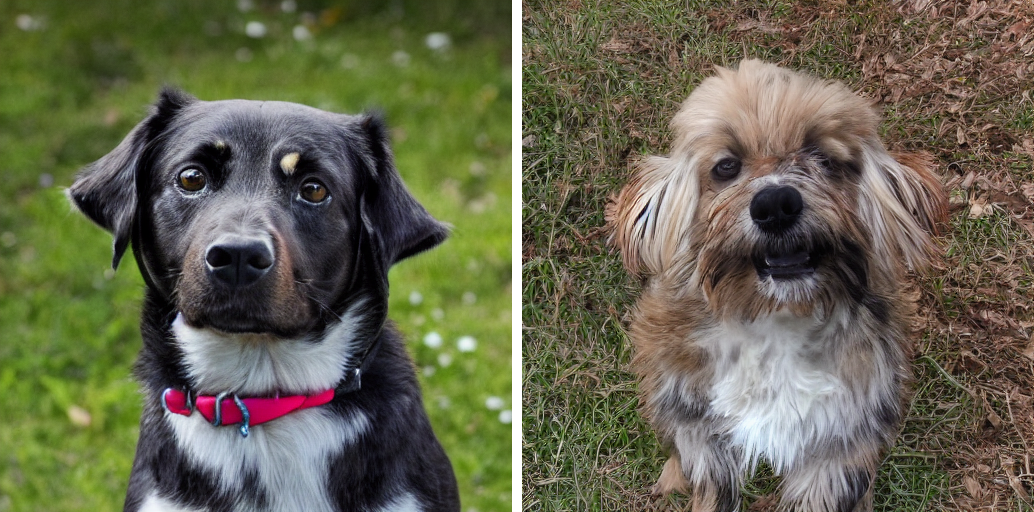

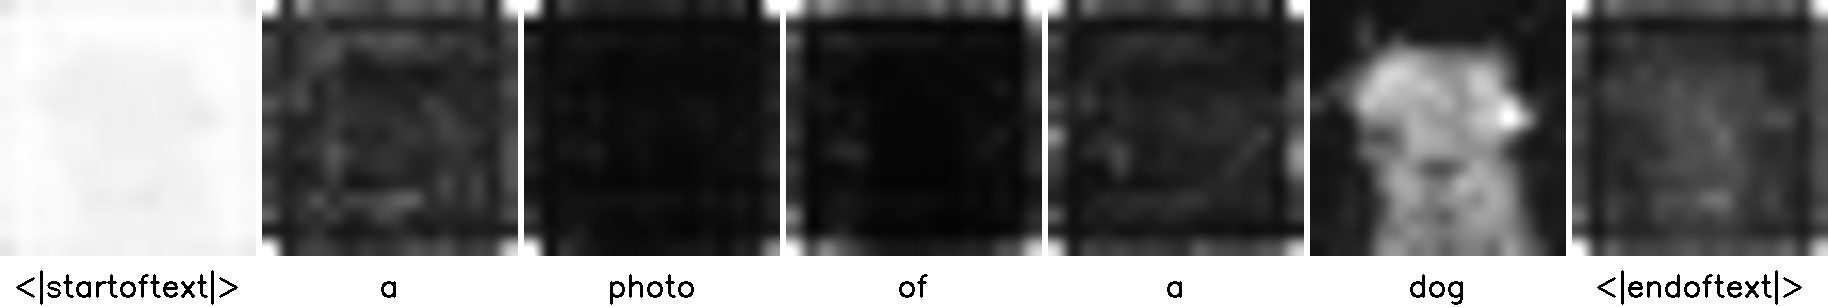

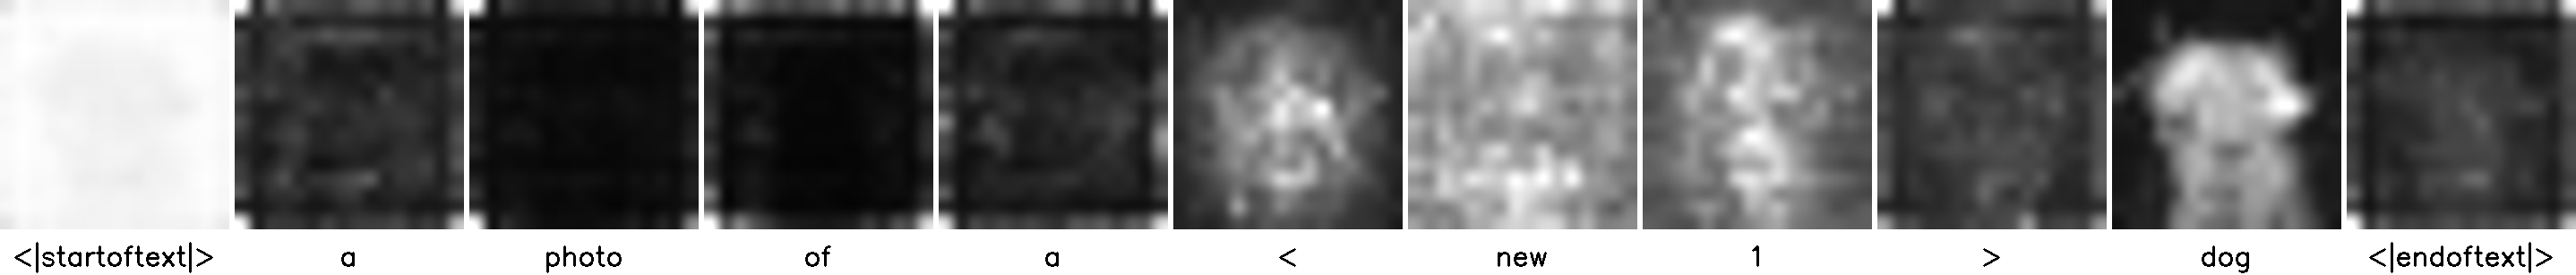

In [10]:
prompts = ["A photo of a dog",
           "A photo of a <new1> dog"]

NUM_DIFFUSION_STEPS = 50
lb = LocalBlend(prompts, ("dog", "dog"),tokenizer=pipe.tokenizer, device=pipe.device)   # only change the local squirrel
controller = AttentionRefine(prompts, NUM_DIFFUSION_STEPS, 
                            cross_replace_steps=.7,
                            self_replace_steps=.3,
                            tokenizer=pipe.tokenizer,
                            device=pipe.device,)
g_cpu = torch.Generator().manual_seed(5837)
outputs = pipe(prompt=prompts, height=512, width=512, num_inference_steps=NUM_DIFFUSION_STEPS,
                controller=controller,  guidance_scale = 6.0, generator=g_cpu,)
view_images( [np.array(img) for img in outputs.images] )
pipe.show_cross_attention(prompts, controller, res=16, from_where=("up", "down"), select=0)
pipe.show_cross_attention(prompts, controller, res=16, from_where=("up", "down"), select=1)

## PhotoSwap

In [13]:
import os
from typing import Optional, Union, Tuple, List, Callable, Dict
from tqdm.notebook import tqdm
import torch
from diffusers import StableDiffusionPipeline, DDIMScheduler
import torch.nn.functional as nnf
import numpy as np
from PIL import Image
#from inversion import NullInversion
#from attentionControlMulti import AttentionSwap, LocalBlend
from photoswapUtils import text2image

In [22]:
#g_cpu = torch.Generator().manual_seed(2333)
device = torch.device('cuda:3') if torch.cuda.is_available() else torch.device('cpu')
pipe = Prompt2PromptPipeline.from_pretrained(model_path).to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/home/ld_xu/myproject/diffusers/src/diffusers/models/lora.py:300: FutureWarning: `LoRACompatibleConv` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleConv` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleConv", "1.0.0", deprecation_message)
/home/ld_xu/myproject/diffusers/src/diffusers/models/lora.py:387: FutureWarning: `LoRACompatibleLinear` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleLinear` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleLinear", "1.0.0", deprecation_message)


/home/ld_xu/myproject/diffusers/src/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:293: FutureWarning: `_encode_prompt()` is deprecated and it will be removed in a future version. Use `encode_prompt()` instead. Also, be aware that the output format changed from a concatenated tensor to a tuple.
  deprecate("_encode_prompt()", "1.0.0", deprecation_message, standard_warn=False)
/home/ld_xu/myproject/multiConcept/multiConcept/pipeline_prompt2prompt.py:65: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  num_channels_latents = self.unet.in_channels


  0%|          | 0/50 [00:00<?, ?it/s]

/home/ld_xu/myproject/diffusers/src/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:567: FutureWarning: The decode_latents method is deprecated and will be removed in 1.0.0. Please use VaeImageProcessor.postprocess(...) instead
  deprecate("decode_latents", "1.0.0", deprecation_message, standard_warn=False)


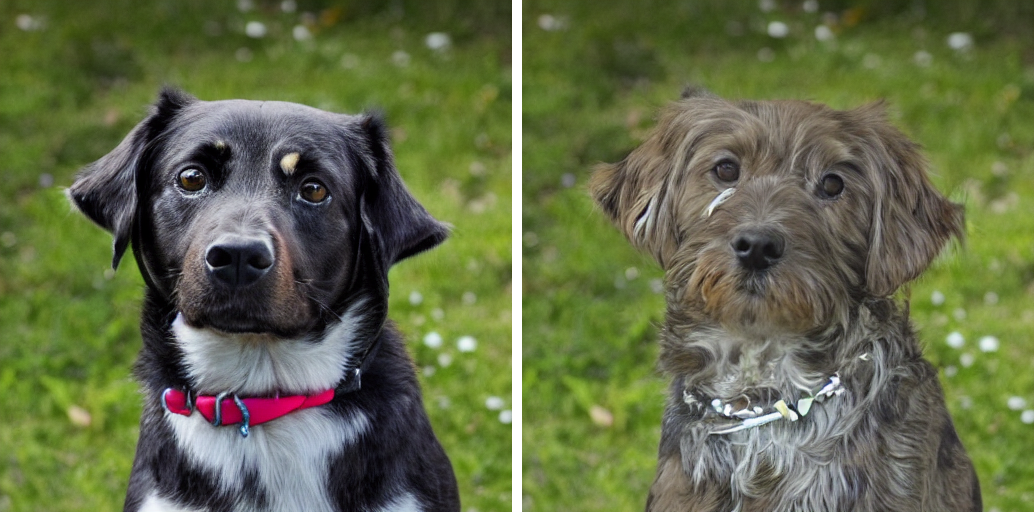

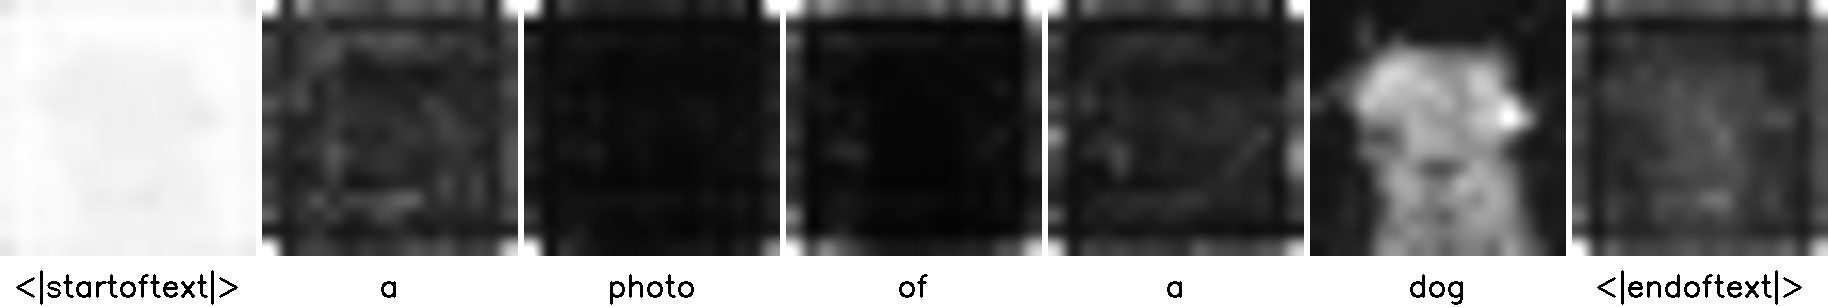

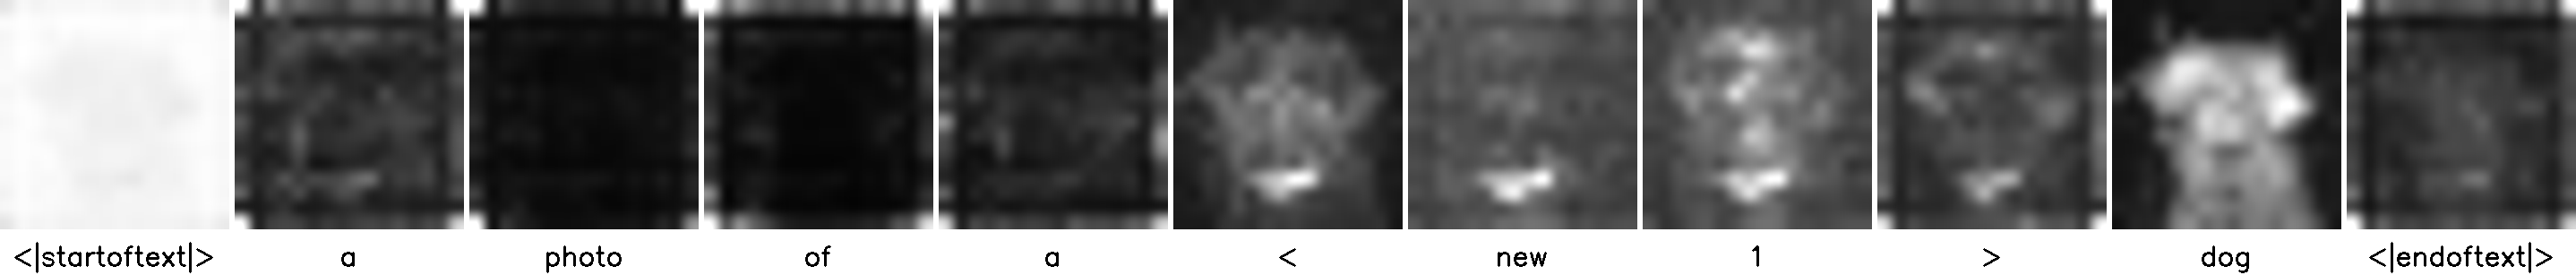

In [23]:
prompts = ["A photo of a dog",
           "A photo of a <new1> dog"]

source_subject_word = 'dog'
target_subject_word = '<new1>'

NUM_DIFFUSION_STEPS = 50
controller = AttentionSwap(prompts, NUM_DIFFUSION_STEPS,
                        cross_map_replace_steps=.7,
                        self_map_replace_steps=.3,
                        self_output_replace_steps=.2,
                        source_subject_word=source_subject_word,
                        target_subject_word=target_subject_word,
                        tokenizer=pipe.tokenizer,
                        device=device,
                        )

g_cpu = torch.Generator().manual_seed(5837)

# images, x_t = text2image(pipe,
#                         prompts,
#                         controller,
#                         num_inference_steps=NUM_DIFFUSION_STEPS,
#                         guidance_scale=6.0,
#                         generator=g_cpu)
outputs = pipe(prompt=prompts, height=512, width=512, num_inference_steps=NUM_DIFFUSION_STEPS,
                controller=controller,  guidance_scale = 6.0, generator=g_cpu,)
view_images( [np.array(img) for img in outputs.images] )
pipe.show_cross_attention(prompts, controller, res=16, from_where=("up", "down"), select=0)
pipe.show_cross_attention(prompts, controller, res=16, from_where=("up", "down"), select=1)